[[-2.  ]
 [-1.75]
 [-1.5 ]
 [-1.25]
 [-1.  ]
 [-0.75]
 [-0.5 ]
 [-0.25]
 [ 0.  ]
 [ 0.25]
 [ 0.5 ]
 [ 0.75]
 [ 1.  ]
 [ 1.25]
 [ 1.5 ]
 [ 1.75]] [[-4.36129228]
 [-2.91489898]
 [-5.90574539]
 [-2.47377862]
 [-2.07488362]
 [-2.07858883]
 [-1.96878315]
 [ 0.67889755]
 [ 1.06255104]
 [ 1.56904222]
 [ 2.09171509]
 [ 2.69606233]
 [ 2.07791014]
 [ 2.68193999]
 [ 3.34089943]
 [ 6.0691044 ]]


<ipython-input-4-0eeba03d8f25>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, x*a, Color='k', LineWidth=2, label='True line')
<ipython-input-4-0eeba03d8f25>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements
<ipython-input-4-0eeba03d8f25>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')


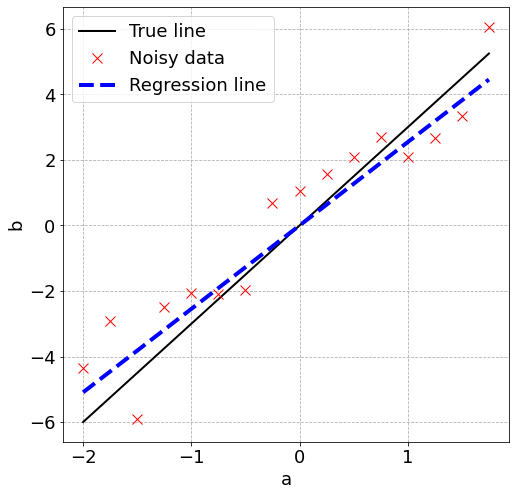

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise
print(a,b)

# Visualize True relationship and noisy data
plt.plot(a, x*a, Color='k', LineWidth=2, label='True line')

plt.plot(a, b, 'x', Color='r', MarkerSize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)

# pseudo_inverse A+
pseudo_A = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
xtilde = pseudo_A @ b # Least-square fit

plt.plot(a,xtilde * a,'--',Color='b',LineWidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()


In [2]:
# Three methods of computing regression

xtilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# The third method is specific to Matlab:
# xtilde3 = regress(b,a)